### Support vector machine using the custum code and sklearn
- Data generation
- Data preprocessing
- Data visulization
- Model
- Accuracy

In [3]:
#Data generation
from sklearn.datasets import make_classification

X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)

print("The shape of the X is {}".format(X.shape))
print("The shape of the Y is {}".format(Y.shape))

The shape of the X is (400, 2)
The shape of the Y is (400,)


In [5]:
## Data preprocessing
Y[Y==0] = -1
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

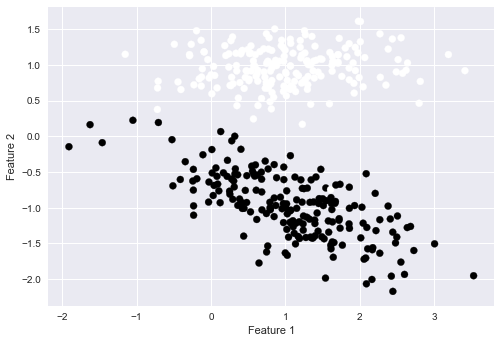

In [6]:
## Data visulization
import matplotlib.pyplot as plt

plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [19]:
## Model
"""Written by deepanshu garg"""

import numpy as np

class SVM:
    def __init__(self,C):
        """Constructor set value for the Error constant"""
        self.C = C
        self.W = 0
        self.B = 0
    
    def hingeLoss(self,W,b,X,Y):
        """Function return the hinge loss"""
        loss  = 0.0
        loss += .5*np.dot(W,W.T)
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
        return loss[0][0]
    
    def fit(self,x,y,batch_size=100,learning_rate=0.001,maxItr=300):
        no_of_features = x.shape[1]
        no_of_examples = x.shape[0]
        
        n = learning_rate
        c = self.C
        W = np.zeros((1,no_of_features))
        B = 0.0
        
        losses = []
        for i in range(maxItr):
            losses.append(self.hingeLoss(W,B,x,y))
            ids = np.arange(no_of_examples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,x.shape[0],batch_size):
                gradw = 0
                gradb = 0
                
                for j in range(batch_start,batch_start + batch_size):
                    if(j<no_of_examples):
                        i = ids[j]
                        ti =  y[i]*(np.dot(W,x[i].T) + B)
                        if(ti<1):
                            gradw += c*y[i]*x[i]
                            gradb += c*y[i]
                W = W - n*W + n*gradw
                B = B + n*gradb
        self.W = W
        self.B = B
        
        return losses,W,B

In [20]:
## MAke an object
svc = SVM(1)
losses,W,B = svc.fit(X,Y,maxItr = 100)

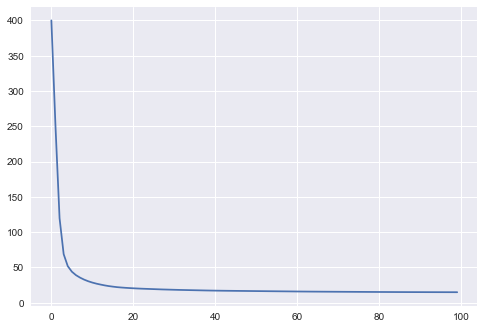

In [22]:
###Visulizing the loss
plt.plot(losses)

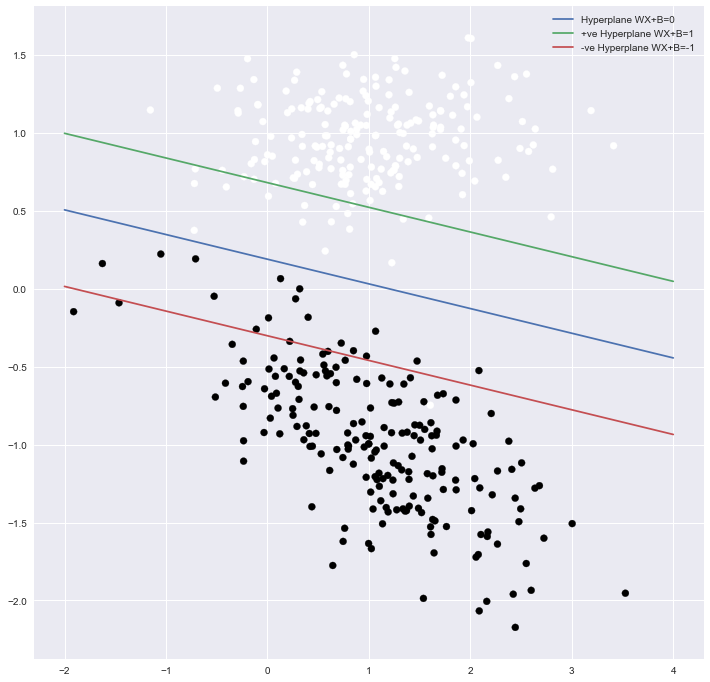

In [25]:
### Visulize the boundary
def plotBoundary(w1,w2,b):
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2 # WT + B = 0
    
    x_p = -(w1*x_1+b+1)/w2 # WT + B = -1
    x_n = -(w1*x_1+b-1)/w2 # WT + B = +1
    
    
    plt.plot(x_1,x_2,label="Hyperplane WX+B=0")
    plt.plot(x_1,x_p,label="+ve Hyperplane WX+B=1")
    plt.plot(x_1,x_n,label="-ve Hyperplane WX+B=-1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()
    
plotBoundary(W[0,0],W[0,1],B)

In [36]:
### Using the sklearn
from sklearn import svm
scv = svm.SVC(kernel='linear')
scv.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

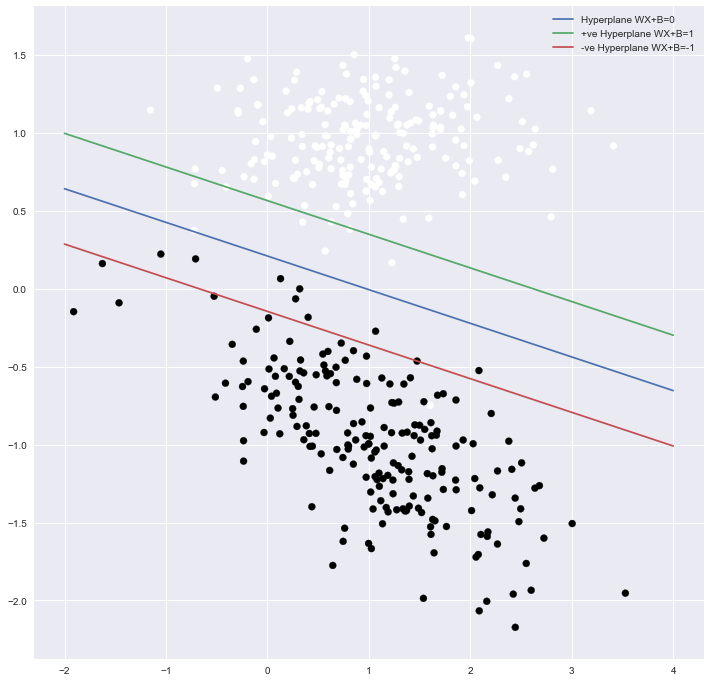

In [38]:
plotBoundary(scv.coef_[0,0],scv.coef_[0,1],scv.intercept_)

In [40]:
scv.score(X,Y)

0.9975